### MACHINE LEARNING MODELS FOR THE DIABETES DATASET (RAW)

First of all, we will perform data curation and preparation. Next, we will apply the following Machine Learning models:

- Linear Regression
- k-Nearest Neighbors(k-NN)
- Support Vector Machines (SVM)
- Classification Trees
- Random Forest
- Gradient Boosting
- Neural Networks(NN)

**Import the necessary libraries:**

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, make_scorer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

import matplotlib.pyplot as plt

import shap

2023-06-16 10:40:14.369235: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 10:40:14.414052: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba

**Load the dataset**

In [2]:
df = pd.read_csv("../datasets/diabetes_data_raw.csv", sep=",")

**We check that we have loaded the dataset correctly by showing the first 5 rows of the dataset**

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**We explore the original dataset**

In [4]:
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

**Check if there is any data that is null to eliminate it, if it exists:**

In [5]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

**Eliminate duplicate data if any**

In [5]:
df.drop_duplicates(inplace=True)

**Convert categorical variables to factors:**

In [6]:
df["Age"] = df["Age"].astype("category").cat.codes
df["Gender"] = df["Gender"].astype("category").cat.codes
df["Polyuria"] = df["Polyuria"].astype("category").cat.codes
df["Polydipsia"] = df["Polydipsia"].astype("category").cat.codes
df["sudden weight loss"] = df["sudden weight loss"].astype("category").cat.codes  
df["weakness"] = df["weakness"].astype("category").cat.codes
df["Polyphagia"] = df["Polyphagia"].astype("category").cat.codes
df["Genital thrush"] = df["Genital thrush"].astype("category").cat.codes


df["visual blurring"] = df["visual blurring"].astype("category").cat.codes
df["Itching"] = df["Itching"].astype("category").cat.codes
df["Irritability"] = df["Irritability"].astype("category").cat.codes
df["delayed healing"] = df["delayed healing"].astype("category").cat.codes
df["partial paresis"] = df["partial paresis"].astype("category").cat.codes  
df["muscle stiffness"] = df["muscle stiffness"].astype("category").cat.codes
df["Alopecia"] = df["Alopecia"].astype("category").cat.codes
df["Obesity"] = df["Obesity"].astype("category").cat.codes

df["class"] = df["class"].astype("category").cat.codes

In [7]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


**Next, we must do the scaling on train, we apply it, and we do the scaling again on test**

**We split the dataset into train and test**

In [7]:
X = df.drop(["class"], axis=1)
y = df["class"]

# add stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**We check that the shapes of the splitted sets are correct as expected**

In [23]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (200, 16)
X_test shape: (51, 16)
y_train: (200,)
y_test shape: (51,)


### LOGISTIC REGRESSION:  
#### linear regression method for binary classification problems

 We create and train the logistic regression model

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


We make the predictions on the test partition:

In [ ]:
y_pred_logistic = model.predict(X_test)

We evaluate the model obtained:

In [ ]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
print("Accuracy:", accuracy_logistic)
print("Classification Report:\n", report_logistic)

### KNN

We choose the different parameters for gridSearch

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

We create the classifier

In [ ]:
knn = KNeighborsClassifier()

We create the GridSearch object

In [ ]:
# refit true, para que entrenemos con todos los datos
grid_search = GridSearchCV(knn, param_grid, cv=5, refit=True)

We make the model fit

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

Get the best model and its predictions

In [ ]:
best_model = grid_search.best_estimator_
y_pred_knn = best_model.predict(X_test)

Evaluate the best model

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_knn)
print("Classification Report:\n", report_knn)

### CLASSIFICATION TREES

In [ ]:
param_grid = {'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_model = grid_search.best_estimator_
y_pred_ct = best_model.predict(X_test)

In [ ]:
accuracy_ct = accuracy_score(y_test, y_pred_ct)
report_ct = classification_report(y_test, y_pred_ct)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_ct)
print("Classification Report:\n", report_ct)

### RANDOM FOREST

We choose the different parameters for gridSearch

In [ ]:
param_grid = {"n_estimators": [50, 100, 200],
              "max_depth": [None, 5, 10],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4]}

We create the classifier

In [ ]:
rfc = RandomForestClassifier(random_state=42)

We create the GridSearch object

In [ ]:
grid_search = GridSearchCV(rfc, param_grid, cv=5)

We make the model fit

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

In [ ]:
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)

### SVM (Support Vector Machine)

In [ ]:
param_grid = {"C": [0.1, 0.25, 0.5, 0.75, 1, 2],
              "kernel": ["linear", "poly", "rbf", "sigmoid"],
              "gamma": ["scale", "auto"]}

In [ ]:
svm = SVC()

In [ ]:
grid_search = GridSearchCV(svm, param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

In [ ]:
best_model_svm = grid_search.best_estimator_
y_pred_svm = best_model_svm.predict(X_test)

In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)

### NEURAL NETWORK:

We create the model:

In [13]:
def create_model(optimizer='adam', loss='binary_crossentropy', cells_layer1=128):
    model_nn = Sequential()
    model_nn.add(Dense(cells_layer1, input_dim=X_train.shape[1], activation='relu'))
    model_nn.add(Dense(1, activation='sigmoid'))
    model_nn.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model_nn

We define the parameter grid

In [14]:
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'loss': ['binary_crossentropy', 'mse'],
    'epochs': [10, 20, 30],
    'batch_size': [16, 32, 64],
    'cells_layer1':[256, 128, 64, 32, 16]
}

Evaluate and train:

In [24]:
# Create the KerasClassifier wrapper
model_nn = KerasClassifier(build_fn=create_model, verbose=0)


# Create the GridSearchCV instance
grid_search = GridSearchCV(estimator=model_nn, param_grid=param_grid, cv=3,
                           scoring=make_scorer(accuracy_score))

# Fit the data to perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model_nn = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model with all the data
best_model_nn.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model_nn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters: ", best_params)
print(f'Test Accuracy: {accuracy*100:.2f}%')


KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


ValueError: 
All the 540 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/keras/wrappers/scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "/tmp/ipykernel_11941/3065979895.py", line 2, in create_model
    model_nn = Sequential()
NameError: name 'Sequential' is not defined


In [9]:
# Initialize the model
model_nn = tf.keras.Sequential()

# Add input layer and hidden layers
model_nn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
# Add output layer
model_nn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_nn.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Train the model
model_nn.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
# Meter validacion para ver cuando parar en que época(para encontrar el mejor modelo)
# Cuando encuentre el bueno, reentreno con todo, scikitlearn lo hace solo, pero keras no

# Evaluate the model
loss, accuracy = model_nn.evaluate(X_test, y_test.values, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

Epoch 1/20


2023-06-16 10:40:36.535338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


13/13 [==============================] - 0s 1ms/step - loss: 0.6373 - accuracy: 0.6803
Epoch 2/20
13/13 [==============================] - 0s 1ms/step - loss: 0.5068 - accuracy: 0.7212
Epoch 3/20
13/13 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8774
Epoch 4/20
13/13 [==============================] - 0s 1ms/step - loss: 0.2652 - accuracy: 0.9255
Epoch 5/20
13/13 [==============================] - 0s 1ms/step - loss: 0.1999 - accuracy: 0.9327
Epoch 6/20
13/13 [==============================] - 0s 1ms/step - loss: 0.1775 - accuracy: 0.9423
Epoch 7/20
13/13 [==============================] - 0s 986us/step - loss: 0.1431 - accuracy: 0.9519
Epoch 8/20
13/13 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.9615
Epoch 9/20
13/13 [==============================] - 0s 1ms/step - loss: 0.1151 - accuracy: 0.9639
Epoch 10/20
13/13 [==============================] - 0s 975us/step - loss: 0.1061 - accuracy: 0.9639
Epoch 11/20
13/13 [=======

### AdaBoost (Adaptative Boosting):

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_predictions = adaboost.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)

In [ ]:
print("AdaBoost Accuracy:", adaboost_accuracy)

### Gradient Boosting:

In [ ]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions)

In [ ]:
print("Gradient Boosting Accuracy:", gradient_boosting_accuracy)

### TODO: visualizacion de features y plots; mirar accuracy, matriz de confusion,roc. auc

Adding shap:

#### Shap Values NN

In [10]:
# Inicializamoss SHAP explainer
explainer = shap.DeepExplainer(model_nn, X_train)
# Calculamos SHAP values
shap_values_nn = explainer.shap_values(X_test)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [11]:
df.keys()

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [12]:
df_shap_nn = pd.DataFrame(shap_values_nn[0], columns = df.keys()[:-1])
df_shap_nn.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,-0.001412,0.140981,-0.175078,-0.176440,-0.039116,0.027927,-0.051281,-0.029584,0.043266,-0.174393,-0.031293,-0.038003,-0.032796,0.048194,-0.104637,0.008170
1,-0.003623,-0.012099,-0.017891,0.229200,0.001513,0.011055,-0.011785,0.023998,0.012442,0.080435,0.037746,0.035902,0.002372,0.001246,-0.004722,0.003170
2,-0.014101,-0.013828,0.111242,0.156901,-0.000606,-0.000048,0.027353,0.069192,0.007854,-0.035914,0.050086,0.002099,-0.024363,0.027321,0.017823,0.008559
3,0.001100,-0.144393,-0.207230,-0.189335,-0.026795,-0.047242,0.026107,0.064821,-0.037305,0.060889,-0.053100,-0.028149,-0.007751,0.002755,-0.007934,-0.006359
4,0.005393,-0.131858,-0.191249,-0.185281,-0.005685,-0.033081,-0.038926,-0.024981,-0.017428,0.086236,-0.030126,-0.038227,0.000997,0.011878,-0.013253,-0.000039


In [13]:
mean_shap_nn = df_shap_nn.abs().mean().values
mean_shap_nn

array([0.00521275, 0.09452645, 0.13982325, 0.14298133, 0.01156255,
       0.02105862, 0.03317414, 0.02806546, 0.01971483, 0.08369466,
       0.03090111, 0.01981358, 0.010792  , 0.01899546, 0.02390119,
       0.00397258])

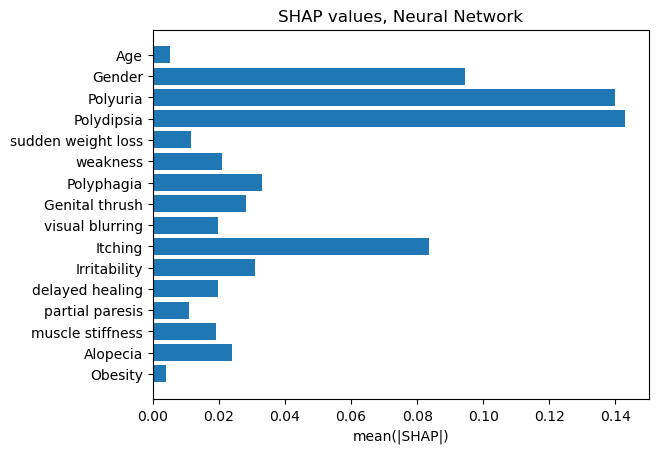

In [14]:
fig, ax = plt.subplots()

features = df.keys()[:-1]
y_pos = np.arange(len(features))
+
ax.barh(y_pos, mean_shap_nn, align='center')
ax.set_yticks(y_pos, labels=features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('mean(|SHAP|)')
ax.set_title('SHAP values, Neural Network')

plt.show()
